In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

##Simple linear regressions
As you have seen, seaborn provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a simple linear regression between two variables using sns.lmplot().

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column 'price' vs the column 'area' from a DataFrame df, you could call sns.lmplot(x='area', y='price', data=df).

In this exercise, you will once again use the DataFrame auto containing the auto-mpg dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.


In [3]:
#init
path = "K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_14_Plot\\"
auto =pd.read_csv(path+"auto-mpg.csv")


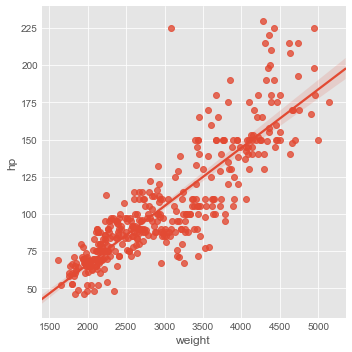

In [4]:
# Import plotting modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show()


## Plotting residuals of a regression
Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data. Seaborn provides sns.residplot() for that purpose, visualizing how far datapoints diverge from the regression line.

In this exercise, you will visualize the residuals of a regression between the 'hp' column (horse power) and the 'mpg' column (miles per gallon) of the auto DataFrame used previously.


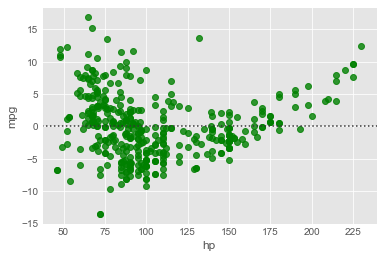

In [5]:

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()


## Higher-order regressions
When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using sns.regplot() (the function sns.lmplot() is a higher-level interface to sns.regplot()). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed (sns.regplot() is more permissive).
For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.
The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.

the function sns.lmplot() is a higher-level interface to sns.regplot().

 - A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed (sns.regplot() is more permissive).

 - For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.

 - The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.


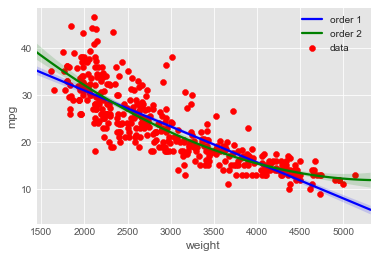

In [6]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'] , label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
#Plot a linear regression line of 'order 1' between 'weight' and 'mpg' in 'blue' without the scatter points.
#You need to specify the label and color parameters, in addition to scatter=None.

sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
#Plot a linear regression line of 'order 2' between 'weight' and 'mpg' in 'green' without the scatter points.
#To force a higher order regression, you need to specify the order parameter. Here, it should be 2.

sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='green',order=2, label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()


## Grouping linear regressions by hue
Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the hue argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

In the automobile dataset - which has been pre-loaded here as auto - you can view the relationship between weight ('weight') and horsepower ('hp') of the cars and group them by their origin ('origin'), giving you a quick visual indication how the relationship differs by continent.

<span style="background-color: #FFFF00">Marked text</span>

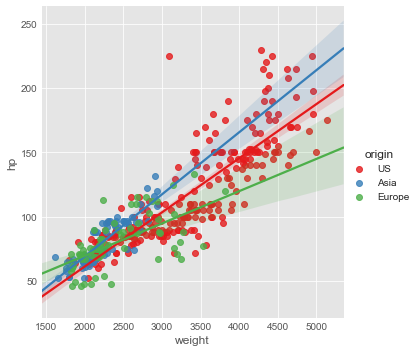

In [7]:
# Plot a linear regression between 'weight' and 'hp' grouped by 'origin'.
# Use the keyword argument hue to group rows with the categorical column 'origin'.
# Use the keyword argument palette to specify the 'Set1' palette for coloring the distinct groups.
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight',y='hp',data=auto,hue='origin',palette='Set1')

# Display the plot
plt.show()


## Grouping linear regressions by row or column
Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The sns.lmplot() accepts the arguments row and/or col to arrangements of subplots for regressions.

You'll use the automobile dataset again and, this time, you'll use the keyword argument row to display the subplots organized in rows. That is, you'll produce horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.


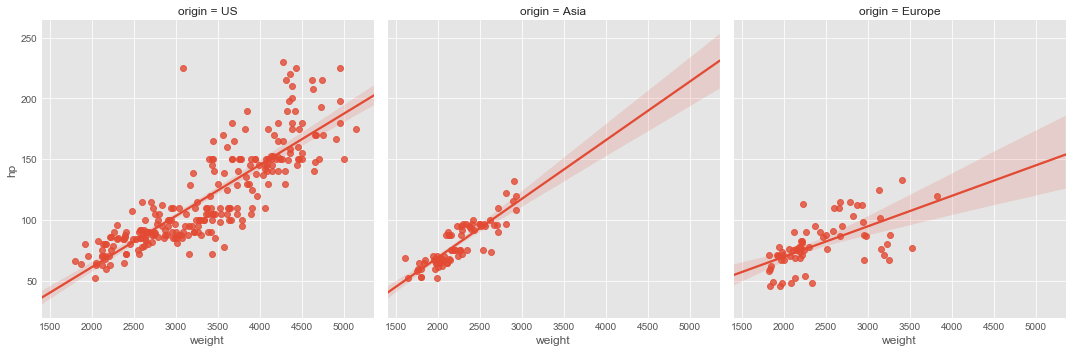

In [8]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
#Plot linear regressions of 'hp' (on the y-axis) versus 'weight' (on the x-axis) grouped row-wise by 'origin' from DataFrame auto.
sns.lmplot(x='weight',y='hp',data=auto,col='origin')

# Display the plot
plt.show()


## Constructing strip plots
Regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

For example, sns.stripplot(x='type', y='length', data=df) produces a sequence of vertical strip plots of length distributions grouped by type (assuming length is a continuous column and type is a categorical column of the DataFrame df).
Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True helps spread out overlapping points.
Other matplotlib arguments can be passed to sns.stripplot(), e.g., marker, color, size, etc.

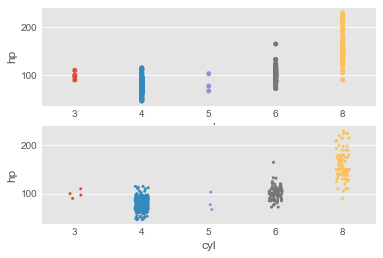

In [9]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto,jitter=True,size=3)

# Display the plot
plt.show()



## Constructing swarm plots
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot(x='type', y='length', data=df).
The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using orient='h' (horizontal) or orient='v' (vertical).
Another grouping can be added in using the hue keyword. For instance, using sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.
In this exercise, you'll use the auto DataFrame again to illustrate the use of sns.swarmplot() with grouping by hue and with explicit specification of the orientation using the keyword orient.


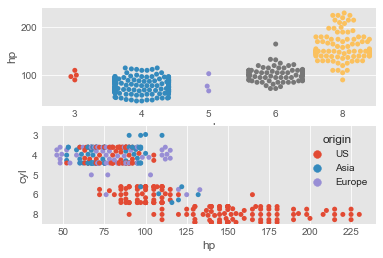

In [12]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
#In the first row of subplots, make a swarm plot showing distribution of 'hp' values grouped horizontally by 'cyl'.
plt.subplot(2,1,1)
sns.swarmplot(x='cyl',y='hp',data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
#In the second row of subplots, make a second swarm plot with horizontal orientation (i.e., grouped vertically by 'cyl' with 'hp' value spread out horizontally) with points colored by 'origin'. You need to specify the orient parameter to explicitly set the horizontal orientation.
plt.subplot(2,1,2)
sns.swarmplot(x='hp',y='cyl',data=auto,hue='origin',orient='h')

# Display the plot
plt.show()


## Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

Here, you will produce violin plots of the distribution of horse power ('hp') by the number of cylinders ('cyl'). Additionally, you will combine two different plot types by overlaying a strip plot on the violin plot.

As before, the DataFrame has been pre-loaded for you as auto.

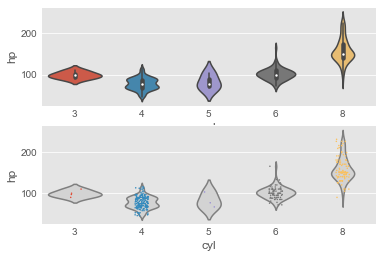

In [14]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto,color='lightgray',inner=None)


# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto,jitter=True,size=1.5)

# Display the plot
plt.show()

## Plotting joint distributions (1)
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) renders a few things:

A scatter plot using the specified columns x and y from the DataFrame data.
A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
A (univariate) histogram along the right of the scatter plot showing distribution of the column y.


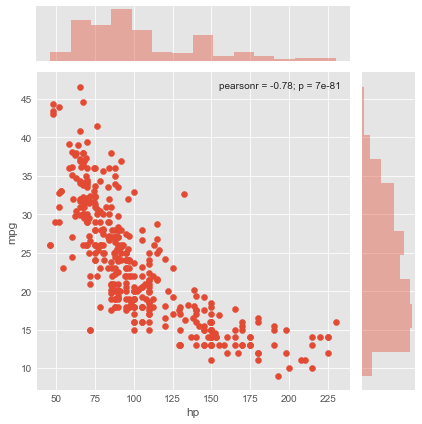

In [15]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp',y='mpg',data=auto)

# Display the plot
plt.show()


## Plotting joint distributions (2)
The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

kind='scatter' uses a scatter plot of the data points
kind='reg' uses a regression plot (default order 1)
kind='resid' uses a residual plot
kind='kde' uses a kernel density estimate of the joint distribution
kind='hex' uses a hexbin plot of the joint distribution
For this exercise, you will again use sns.jointplot() to display the joint distribution of the hp and mpg columns of the auto DataFrame. This time, you will use kind='hex' to generate a hexbin plot of the joint distribution.

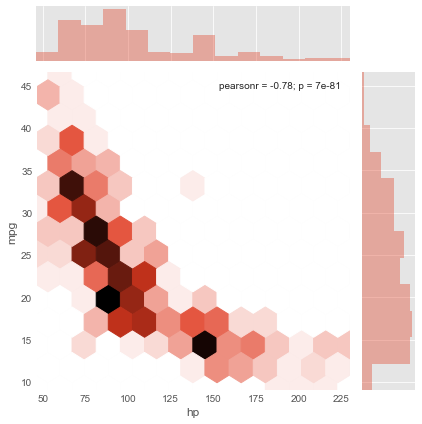

In [17]:
sns.jointplot(x='hp',y='mpg',data=auto,kind='hex')

## Plotting distributions pairwise (1)
Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

In this exercise, you will use a DataFrame auto comprising only three columns from the original auto-mpg data set.

In [ ]:
# Print the first 5 rows of the DataFrame
print(auto.head())


In [27]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto)

# Display the plot
plt.show()


## Plotting distributions pairwise (2)
In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument kind='reg' (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.

In [29]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto,hue='origin',kind='reg')

# Display the plot
plt.show()


    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker  
0  27.370336      o  
1  62.199511      o  
2   9.000000      x  
3  34.515625      o  
4  13.298178      s  


## Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

In [ ]:
#init
import pandas as pd
path = "K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_14_Plot\\"
cov_matrix = pd.read_csv(path+'cov_matrix.csv',index_col=0)


,mpg,hp,weight,accel,displ
mpg,1.000000,-0.778427,-0.832244,0.423329,-0.805127
hp,-0.778427,1.000000,0.864538,-0.689196,0.897257
weight,-0.832244,0.864538,1.000000,-0.416839,0.932994
accel,0.423329,-0.689196,-0.416839,1.000000,-0.543800
displ,-0.805127,0.897257,0.932994,-0.543800,1.000000


In [33]:
cov_matrix



,mpg,hp,weight,accel,displ
mpg,1.000000,-0.778427,-0.832244,0.423329,-0.805127
hp,-0.778427,1.000000,0.864538,-0.689196,0.897257
weight,-0.832244,0.864538,1.000000,-0.416839,0.932994
accel,0.423329,-0.689196,-0.416839,1.000000,-0.543800
displ,-0.805127,0.897257,0.932994,-0.543800,1.000000


          mpg     hp         weight     accel         displ
mpg     1.000000  -0.778427  -0.832244   0.423329 -0.805127
hp     -0.778427   1.000000   0.864538  -0.689196  0.897257
weight -0.832244   0.864538   1.000000  -0.416839  0.932994
accel   0.423329  -0.689196  -0.416839   1.000000 -0.543800
displ  -0.805127   0.897257   0.932994  -0.543800  1.000000


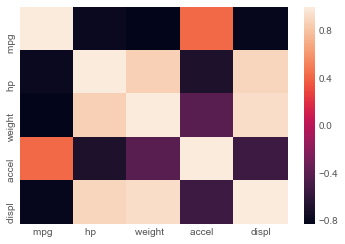

In [34]:
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()
